In [24]:
# 导入需要使用的库,其中numpy是支持数组和矩阵运算的科学计算库,而matplotlib是绘图库
import numpy as np
import matplotlib.pyplot as plt


class BernoulliBandit:
    """ 伯努利多臂老虎机,输入K表示拉杆个数 """
    def __init__(self, K):
        self.probs = np.random.uniform(0,1,size=K)  # 随机生成K个0～1的数,作为拉动每根拉杆的获奖
        # 概率
        self.best_idx = np.argmax(self.probs)  # 获奖概率最大的拉杆
        self.best_prob = self.probs[self.best_idx]  # 最大的获奖概率
        self.K = K

    def step(self, k):
        # 当玩家选择了k号拉杆后,根据拉动该老虎机的k号拉杆获得奖励的概率返回1（获奖）或0（未
        # 获奖）
        if np.random.rand() < self.probs[k]:
            return 1
        else:
            return 0
    
    def reset_1(self):
        self.probs = np.random.uniform(0,1,size=self.K)     # 新的一组拉杆概率
        self.best_idx = np.argmax(self.probs)               # 重新找最大值索引
        self.best_prob = self.probs[self.best_idx]          # 对应最大概率
        return self

    def reset_2(self):
        self.probs = np.random.uniform(0,1,size=self.K)     # 新的一组拉杆概率
        self.best_idx = np.argmax(self.probs)               # 重新找最大值索引
        self.best_prob = self.probs[self.best_idx]          # 对应最大概率

    def print_info(self):
        print("随机生成了一个%d臂伯努利老虎机" % self.K)
        print("获奖概率最大的拉杆为%d号,其获奖概率为%.4f" % (bandit_10_arm.best_idx, bandit_10_arm.best_prob))


np.random.seed(1)  # 设定随机种子,使实验具有可重复性
K = 10
bandit_10_arm = BernoulliBandit(K)
bandit_10_arm.print_info()

# 随机生成了一个10臂伯努利老虎机
# 获奖概率最大的拉杆为1号,其获奖概率为0.7203

'''
bandit_10_arm.reset_1().print_info()

bandit_10_arm.reset_2()
bandit_10_arm.print_info()
'''

随机生成了一个10臂伯努利老虎机
获奖概率最大的拉杆为1号,其获奖概率为0.7203


'\nbandit_10_arm.reset_1().print_info()\n\nbandit_10_arm.reset_2()\nbandit_10_arm.print_info()\n'

In [25]:
class Solver:
    """ 多臂老虎机算法基本框架 """
    def __init__(self, bandit):
        self.bandit = bandit # bandit：老虎机环境类，包含动作数量 K 和 step(k) 函数（返回第 k 个拉杆的奖励）
        self.counts = np.zeros(self.bandit.K)  # 每根拉杆的尝试次数
        self.regret = 0.  # 当前步的累积懊悔
        self.actions = []  # 维护一个列表,记录每一步的动作
        self.regrets = []  # 维护一个列表,记录每一步的累积懊悔

    def update_regret(self, k):
        # 计算累积懊悔并保存,k为本次动作选择的拉杆的编号
        self.regret += self.bandit.best_prob - self.bandit.probs[k]
        self.regrets.append(self.regret)

    def run_one_step(self):
        # 返回当前动作选择哪一根拉杆,由每个具体的策略实现
        raise NotImplementedError

    def run(self, num_steps):
        # 运行一定次数,num_steps为总运行次数
        for _ in range(num_steps):
            k = self.run_one_step()
            self.counts[k] += 1
            self.actions.append(k)
            self.update_regret(k)

In [26]:
class EpsilonGreedy(Solver):
    """ epsilon贪婪算法,继承Solver类
    在每一轮中，以 ε 的概率随机探索，以 1 - \epsilon 的概率利用当前最优估计，拉动最优拉杆。 """
    def __init__(self, bandit, epsilon=0.01, init_prob=1.0):
        super(EpsilonGreedy, self).__init__(bandit)
        self.epsilon = epsilon # epsilon：探索概率
        self.estimates = np.array([init_prob] * self.bandit.K) # 初始化拉动所有拉杆的期望奖励估值

    def run_one_step(self):
        # 先生成随机的数，与epsilon做比较，从而使利用还是探索
        if np.random.random() < self.epsilon:
            k = np.random.randint(0, self.bandit.K)  # 随机选择一根拉杆
        else:
            k = np.argmax(self.estimates)  # 选择期望奖励估值最大的拉杆
        r = self.bandit.step(k)  # 得到本次动作的奖励
        # 用增量式平均更新第 k 个动作的期望奖励估值（不存储历史）
        self.estimates[k] += 1. / (self.counts[k] + 1) * (r -
                                                          self.estimates[k])
        return k

epsilon-贪婪算法的累积懊悔为： 30.77522301715057


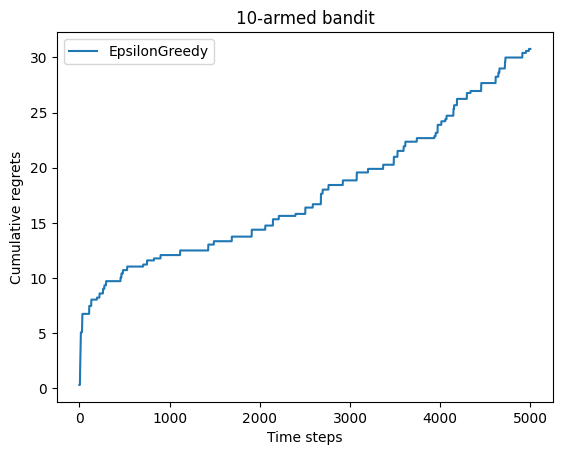

In [ ]:
def plot_results(solvers, solver_names):
    """生成累积懊悔随时间变化的图像。输入solvers是一个列表,列表中的每个元素是一种特定的策略。
    而solver_names也是一个列表,存储每个策略的名称"""
    for idx, solver in enumerate(solvers):
        time_list = range(len(solver.regrets))
        plt.plot(time_list, solver.regrets, label=solver_names[idx])
    plt.xlabel('Time steps')
    plt.ylabel('Cumulative regrets')
    plt.title('%d-armed bandit' % solvers[0].bandit.K)
    plt.legend()
    plt.show()


np.random.seed()
epsilon_greedy_solver = EpsilonGreedy(bandit_10_arm, epsilon=0.01)
epsilon_greedy_solver.run(5000)
print('epsilon-贪婪算法的累积懊悔为：', epsilon_greedy_solver.regret)
plot_results([epsilon_greedy_solver], ["EpsilonGreedy"])

# epsilon-贪婪算法的累积懊悔为：25.526630933945313 随机种子（0）

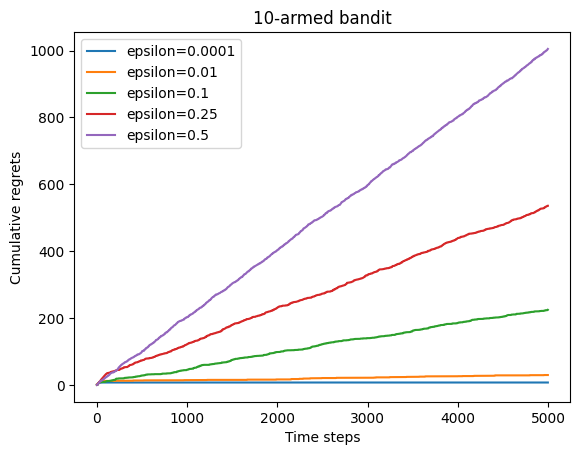

In [36]:
# 在同一个老虎机环境（bandit_10_arm）下，用不同 ε 值跑 ε-greedy 算法，看看谁表现最好。
np.random.seed()
epsilons = [1e-4, 0.01, 0.1, 0.25, 0.5]
epsilon_greedy_solver_list = [
    EpsilonGreedy(bandit_10_arm, epsilon=e) for e in epsilons
]
epsilon_greedy_solver_names = ["epsilon={}".format(e) for e in epsilons]
for solver in epsilon_greedy_solver_list:
    solver.run(5000)

plot_results(epsilon_greedy_solver_list, epsilon_greedy_solver_names)

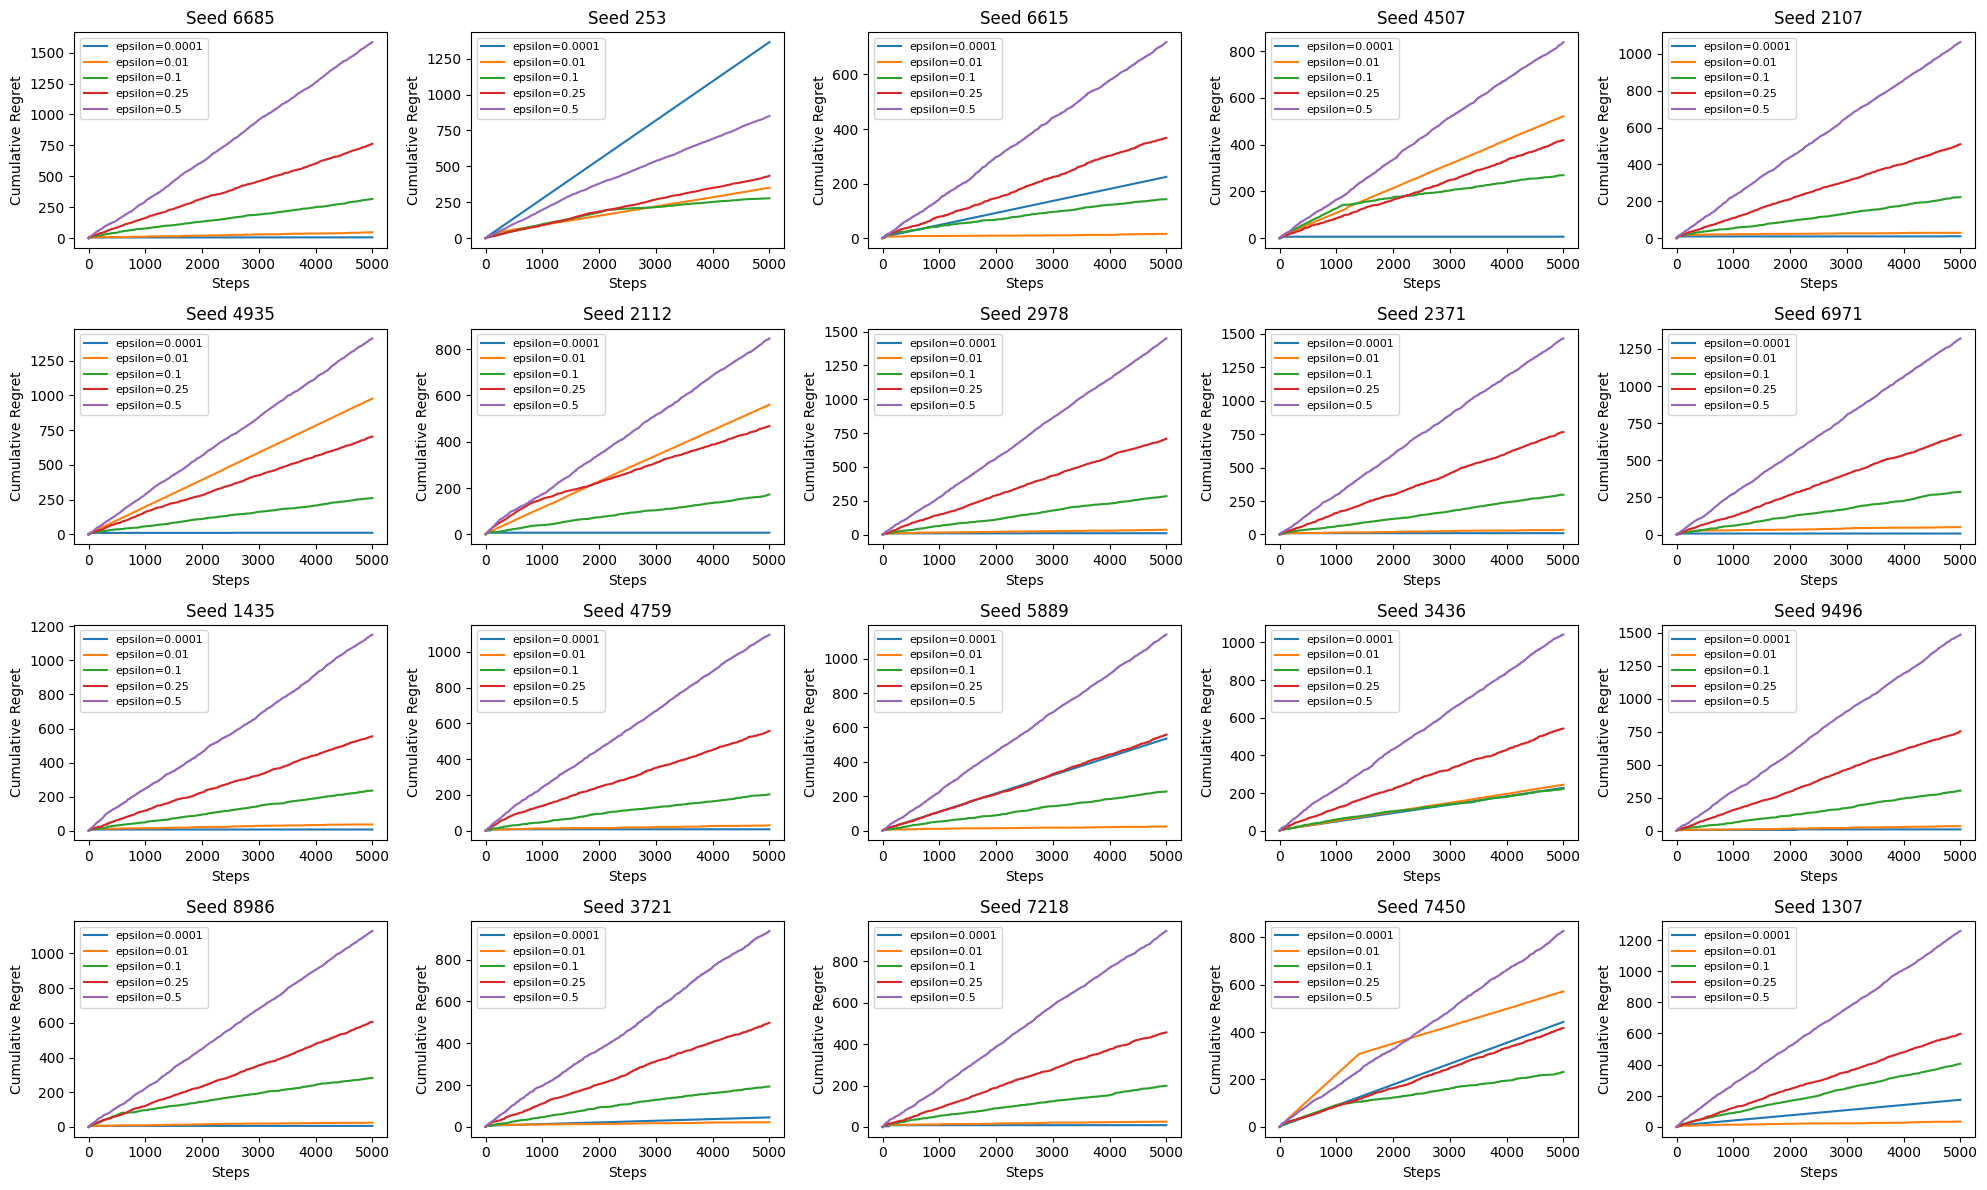

In [ ]:
# 用不同种子生成 20 个子图，每个子图内用同一组 ε
fig, axes = plt.subplots(4, 5, figsize=(20, 12))
epsilons = [1e-4, 0.01, 0.1, 0.25, 0.5]
epsilon_greedy_solver_names = ["epsilon={}".format(e) for e in epsilons]

for idx, ax in enumerate(axes.flat):
    label = np.random.randint(0, 10000)
    np.random.seed(label)
    bandit = BernoulliBandit(10)
    solvers = [EpsilonGreedy(bandit, epsilon=e) for e in epsilons]
    for solver in solvers:
        solver.run(5000)
    # 把每个 solver（策略实例）和其对应的名字（如 epsilon=**）配对
    for solver, name in zip(solvers, epsilon_greedy_solver_names):
        ax.plot(range(len(solver.regrets)), solver.regrets, label=name)
    ax.set_title(f"Seed {label}")
    ax.set_xlabel("Steps")
    ax.set_ylabel("Cumulative Regret")
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

1. 探索 vs 利用的权衡体现 <br>
  • ε 越大，探索越多，前期可能选择了很多糟糕的拉杆 → 懊悔值上升快。<br>
  • ε 越小，基本一直拉预估最好的杆 → 懊悔值低（但可能错过最优杆）。<br><br>

2. 最优 ε 一般在中间<br>
  • 多数子图中，**绿色曲线（ε = 0.1）**表现最好，累计懊悔最低；<br>
  • 说明：这个 ε 达成了不错的“探索-利用平衡”。<br>
  • 蓝色（ε = 0.0001）虽然也低懊悔，但有时会因为探索太少陷入次优解。<br><br>

3. 紫色（ε = 0.5）几乎总是最差  
  • 说明：盲目探索带来的损失非常大，长期来看会严重拉高懊悔。

epsilon值衰减的贪婪算法的累积懊悔为： 10.114334931260183


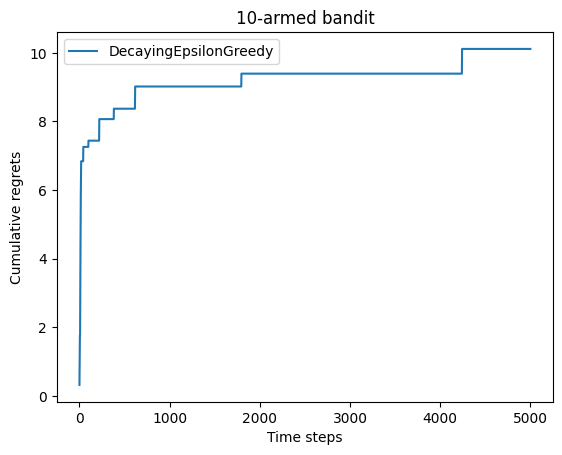

In [ ]:
class DecayingEpsilonGreedy(Solver):
    """ epsilon值随时间衰减的epsilon-贪婪算法,继承Solver类 """
    def __init__(self, bandit, init_prob=1.0):
        super(DecayingEpsilonGreedy, self).__init__(bandit)
        self.estimates = np.array([init_prob] * self.bandit.K)
        self.total_count = 0

    def run_one_step(self):
        self.total_count += 1
        if np.random.random() < 1 / self.total_count:  # epsilon值随时间衰减
            k = np.random.randint(0, self.bandit.K)
        else:
            k = np.argmax(self.estimates)

        r = self.bandit.step(k)
        self.estimates[k] += 1. / (self.counts[k] + 1) * (r -
                                                          self.estimates[k])

        return k
        


np.random.seed(1)
decaying_epsilon_greedy_solver = DecayingEpsilonGreedy(bandit_10_arm)
decaying_epsilon_greedy_solver.run(5000)
print('epsilon值衰减的贪婪算法的累积懊悔为：', decaying_epsilon_greedy_solver.regret)
plot_results([decaying_epsilon_greedy_solver], ["DecayingEpsilonGreedy"])

# epsilon值衰减的贪婪算法的累积懊悔为：10.114334931260183

上置信界算法的累积懊悔为： 70.45281214197854


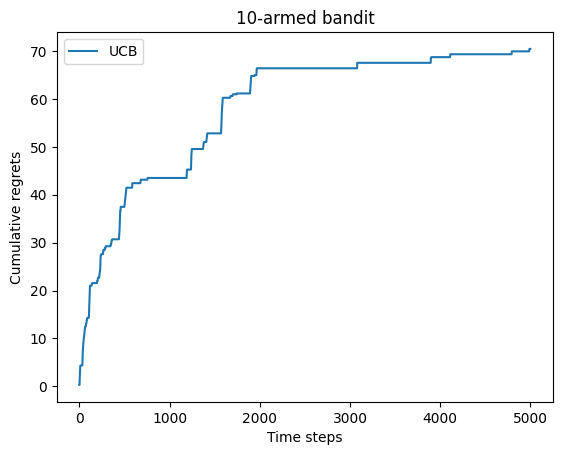

In [61]:
class UCB(Solver):
    """ UCB算法,继承Solver类 
    coef  探索强度系数（调节不确定性项的权重）。越大，算法越倾向于探索；越小，越倾向于利用当前估计。
    init_prob  初始的奖励估计值。默认设为 1.0，表示初始时每个拉杆都被“高估”，从而激发探索。
    """
    def __init__(self, bandit, coef, init_prob=1.0):
        super(UCB, self).__init__(bandit)
        self.total_count = 0
        self.estimates = np.array([init_prob] * self.bandit.K)
        self.coef = coef

    def run_one_step(self):
        # 当前总的拉动次数 +1，用于计算 log(t)
        self.total_count += 1

        # 计算每个拉杆的 UCB 值（置信上界），用于平衡探索与利用
        # self.estimates 表示每个拉杆的当前平均奖励估计（利用）
        # sqrt 部分是探索项：拉动次数少 → 不确定性高 → 值大 → 鼓励探索
        ucb = self.estimates + self.coef * np.sqrt(
            np.log(self.total_count) / (2 * (self.counts + 1))
        )

        # 选择 UCB 值最大的拉杆（最“乐观”地认为可能最优）
        k = np.argmax(ucb)

        # 拉动该拉杆，获得奖励（伯努利分布下为 0 或 1）
        r = self.bandit.step(k)

        # 更新该拉杆的奖励估计值（增量更新均值公式）
        # 注意：self.counts[k] 是之前的拉动次数，因此更新用的是 counts + 1
        self.estimates[k] += 1.0 / (self.counts[k] + 1) * (r - self.estimates[k])

        # 返回当前选择的拉杆编号
        return k


np.random.seed(1)
coef = 1  # 控制不确定性比重的系数
UCB_solver = UCB(bandit_10_arm, coef)
UCB_solver.run(5000)
print('上置信界算法的累积懊悔为：', UCB_solver.regret)
plot_results([UCB_solver], ["UCB"])

# 上置信界算法的累积懊悔为： 70.45281214197854

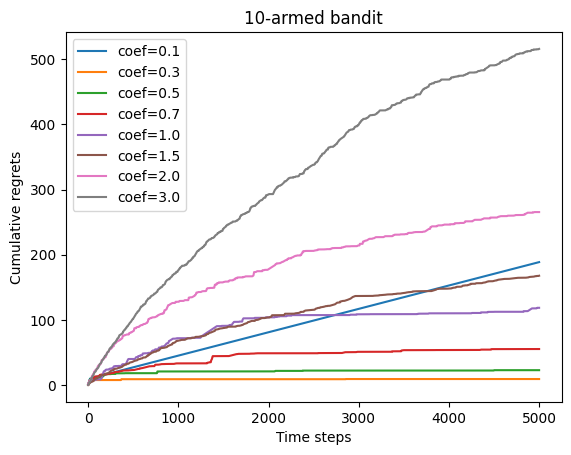

In [66]:
np.random.seed()

# 设置搜索范围
coef_list = [0.1, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0]
ucb_solvers = []
ucb_names = []

for c in coef_list:
    bandit = BernoulliBandit(K=10)  # 每个 coef 重建 bandit，保持公平
    solver = UCB(bandit, coef=c)
    solver.run(5000)
    ucb_solvers.append(solver)
    ucb_names.append(f"coef={c}")

# 可视化对比各个 coef 下的效果
plot_results(ucb_solvers, ucb_names)

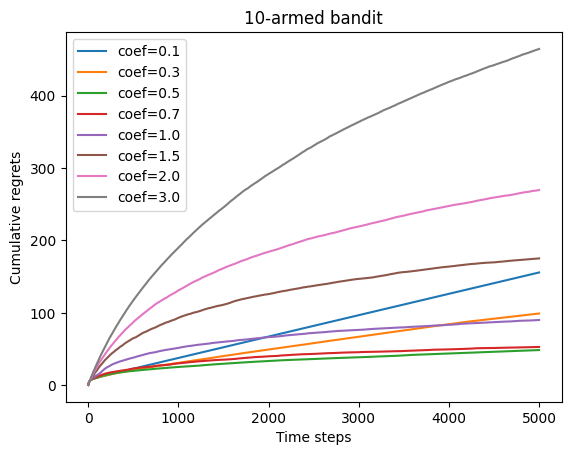

📊 各 coef 下的 50 次平均累积懊悔（5000 步）：
coef=0.10 → 平均累计懊悔: 155.71
coef=0.30 → 平均累计懊悔: 99.04
coef=0.50 → 平均累计懊悔: 48.56
coef=0.70 → 平均累计懊悔: 52.79
coef=1.00 → 平均累计懊悔: 90.07
coef=1.50 → 平均累计懊悔: 175.11
coef=2.00 → 平均累计懊悔: 269.52
coef=3.00 → 平均累计懊悔: 464.39


In [70]:
# --------- 主逻辑：每个 coef 运行 50 次，平均懊悔，调用原函数 ---------

np.random.seed(0)
coef_list = [0.1, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0]
num_steps = 5000
num_experiments = 50
K = 10

# 平均后的 solver 用于画图
avg_solvers = []
solver_names = []
final_regrets_by_coef = {}

for coef in coef_list:
    regrets_list = []
    for i in range(num_experiments):
        np.random.seed(i)
        bandit = BernoulliBandit(K)
        solver = UCB(bandit, coef)
        solver.run(num_steps)
        regrets_list.append(solver.regrets)
    # 对50次的懊悔值按时间取平均
    mean_regrets = np.mean(regrets_list, axis=0)
    dummy_bandit = BernoulliBandit(K)
    dummy_solver = UCB(dummy_bandit, coef)
    dummy_solver.regrets = list(mean_regrets)
    avg_solvers.append(dummy_solver)
    solver_names.append(f"coef={coef}")
    final_regrets_by_coef[coef] = mean_regrets[-1]

# 画图（原函数）
plot_results(avg_solvers, solver_names)

# 打印平均累计懊悔结果
print("📊 各 coef 下的 50 次平均累积懊悔（5000 步）：")
for coef in coef_list:
    print(f"coef={coef:.2f} → 平均累计懊悔: {final_regrets_by_coef[coef]:.2f}")

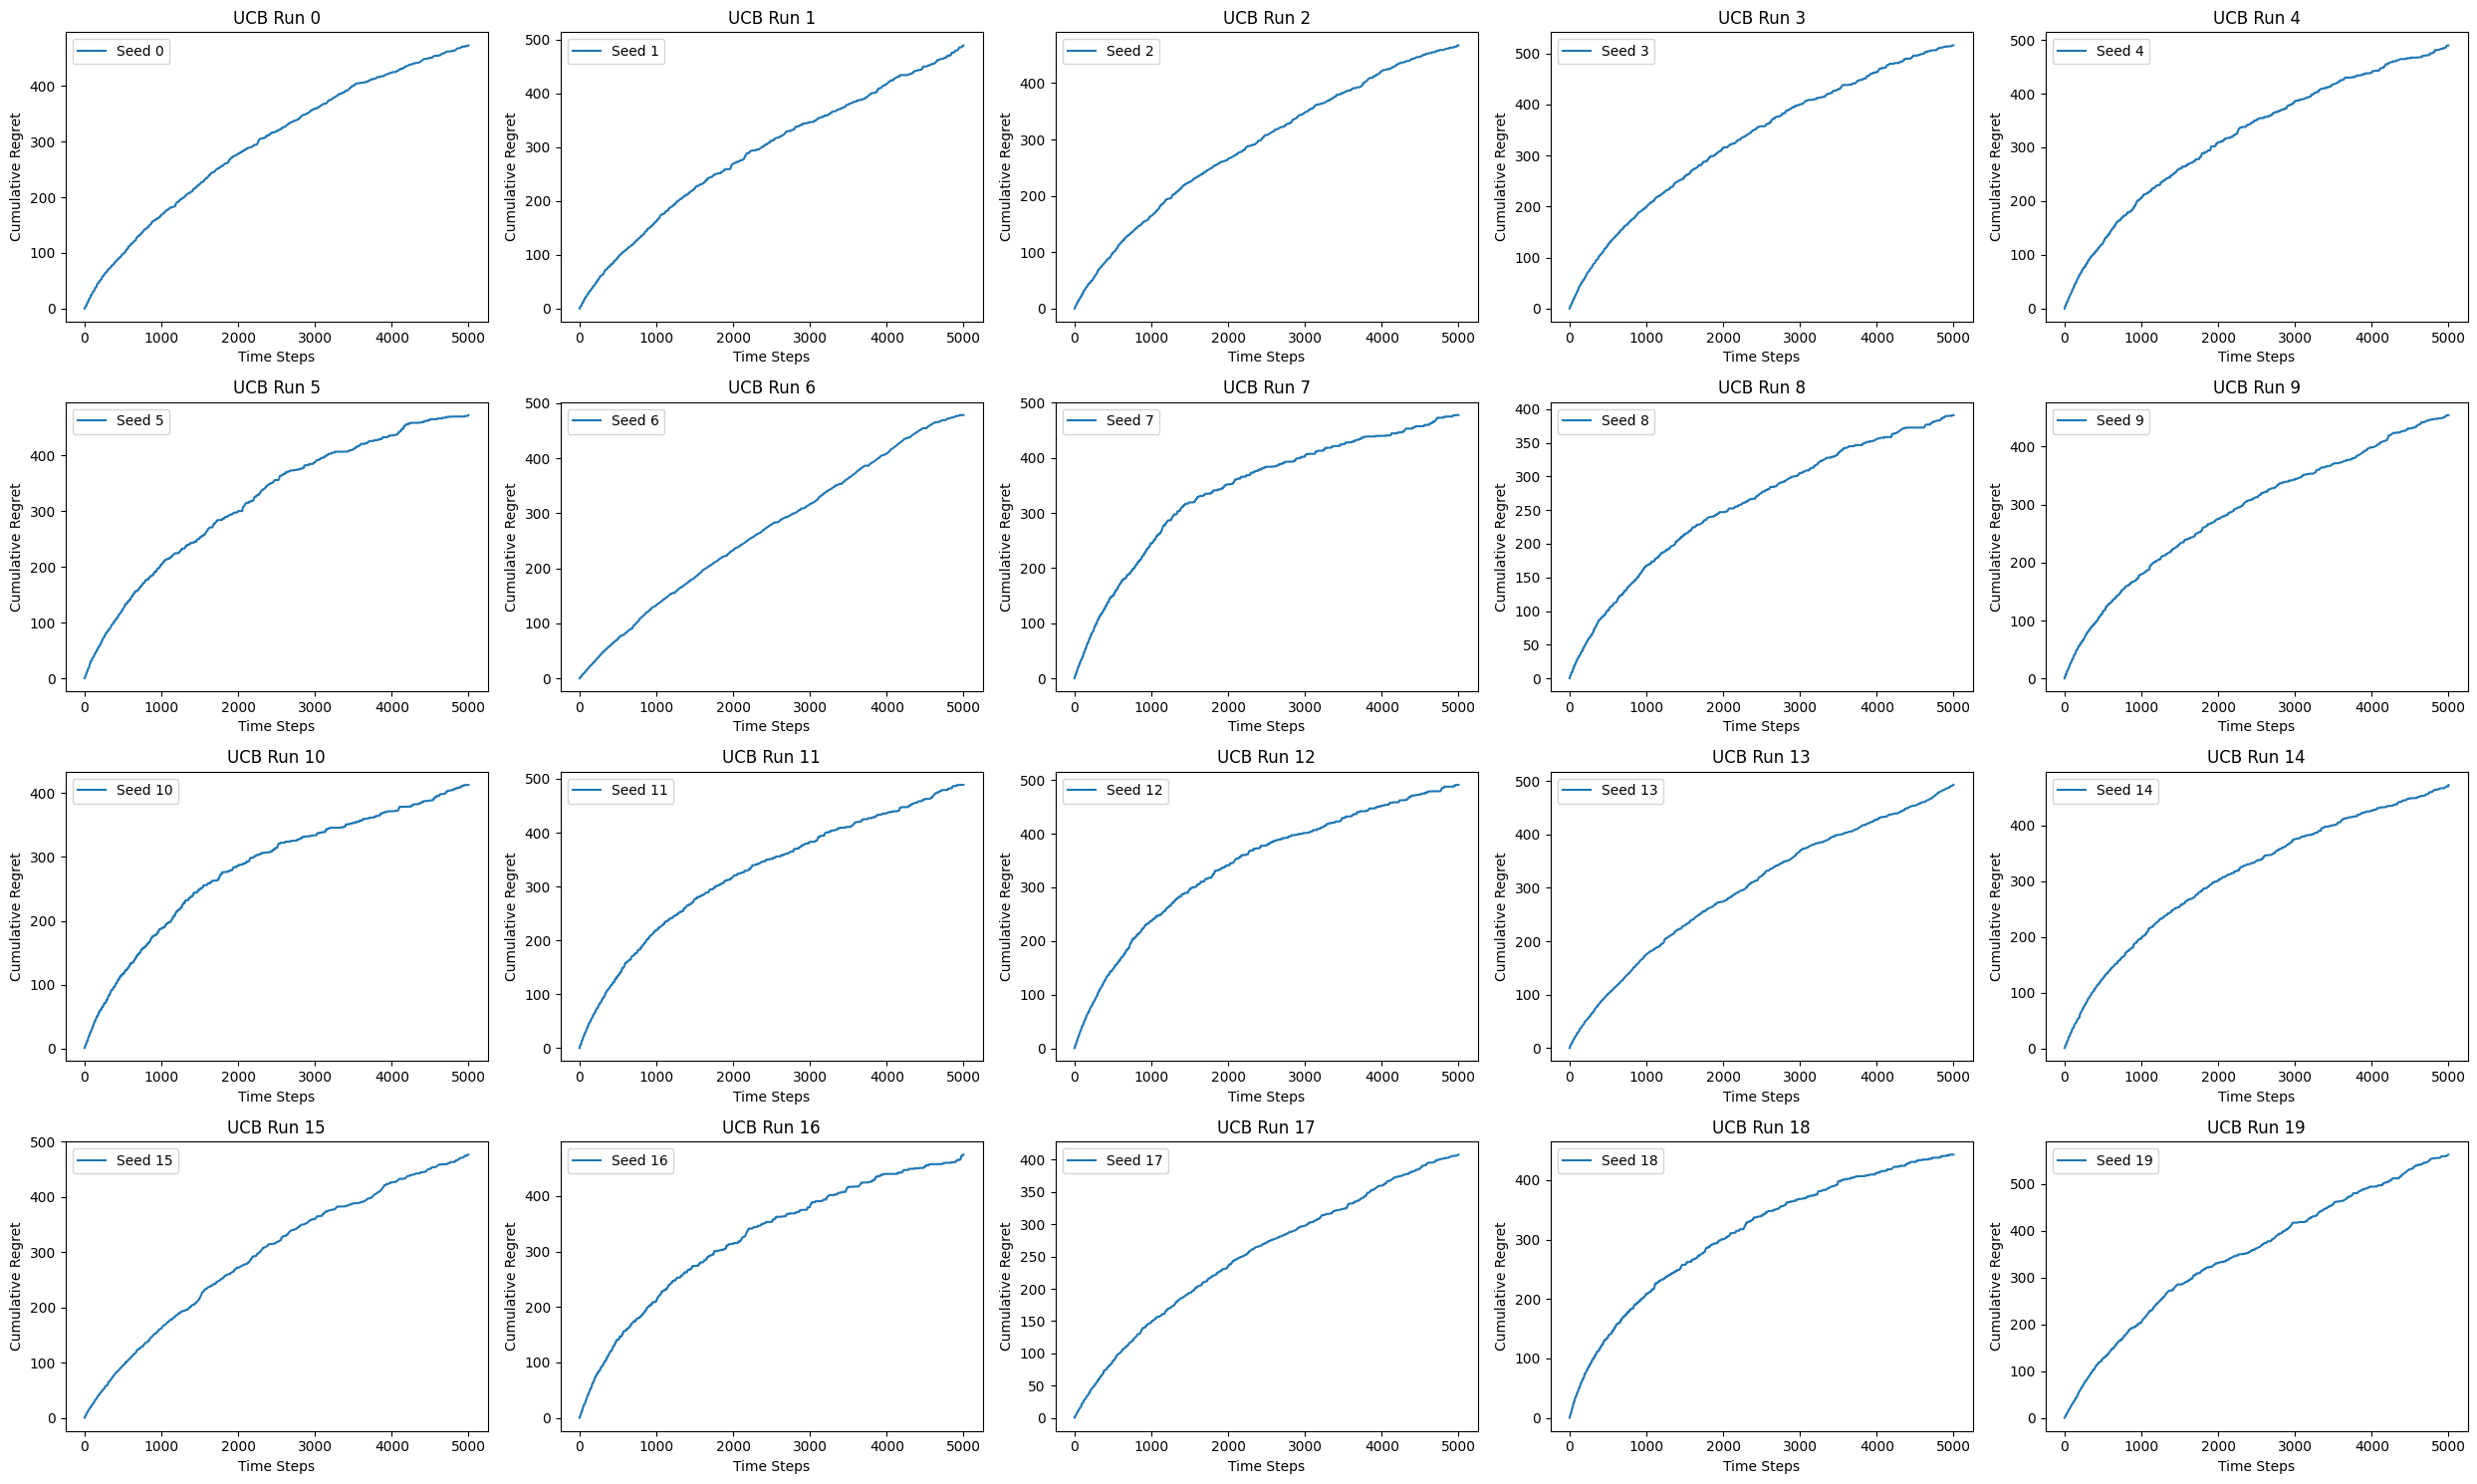

In [74]:
# 生成 20 个子图
num_plots = 20

fig, axes = plt.subplots(4, 5, figsize=(25, 15))
axes = axes.flatten()

for i in range(num_plots):
    np.random.seed(np.random.randint(0, 10000))
    bandit = BernoulliBandit(K)
    solver = UCB(bandit, coef)
    solver.run(num_steps)
    axes[i].plot(range(len(solver.regrets)), solver.regrets, label=f"Seed {i}")
    axes[i].set_title(f"UCB Run {i}")
    axes[i].set_xlabel("Time Steps")
    axes[i].set_ylabel("Cumulative Regret")
    axes[i].legend()

plt.tight_layout()
plt.show()

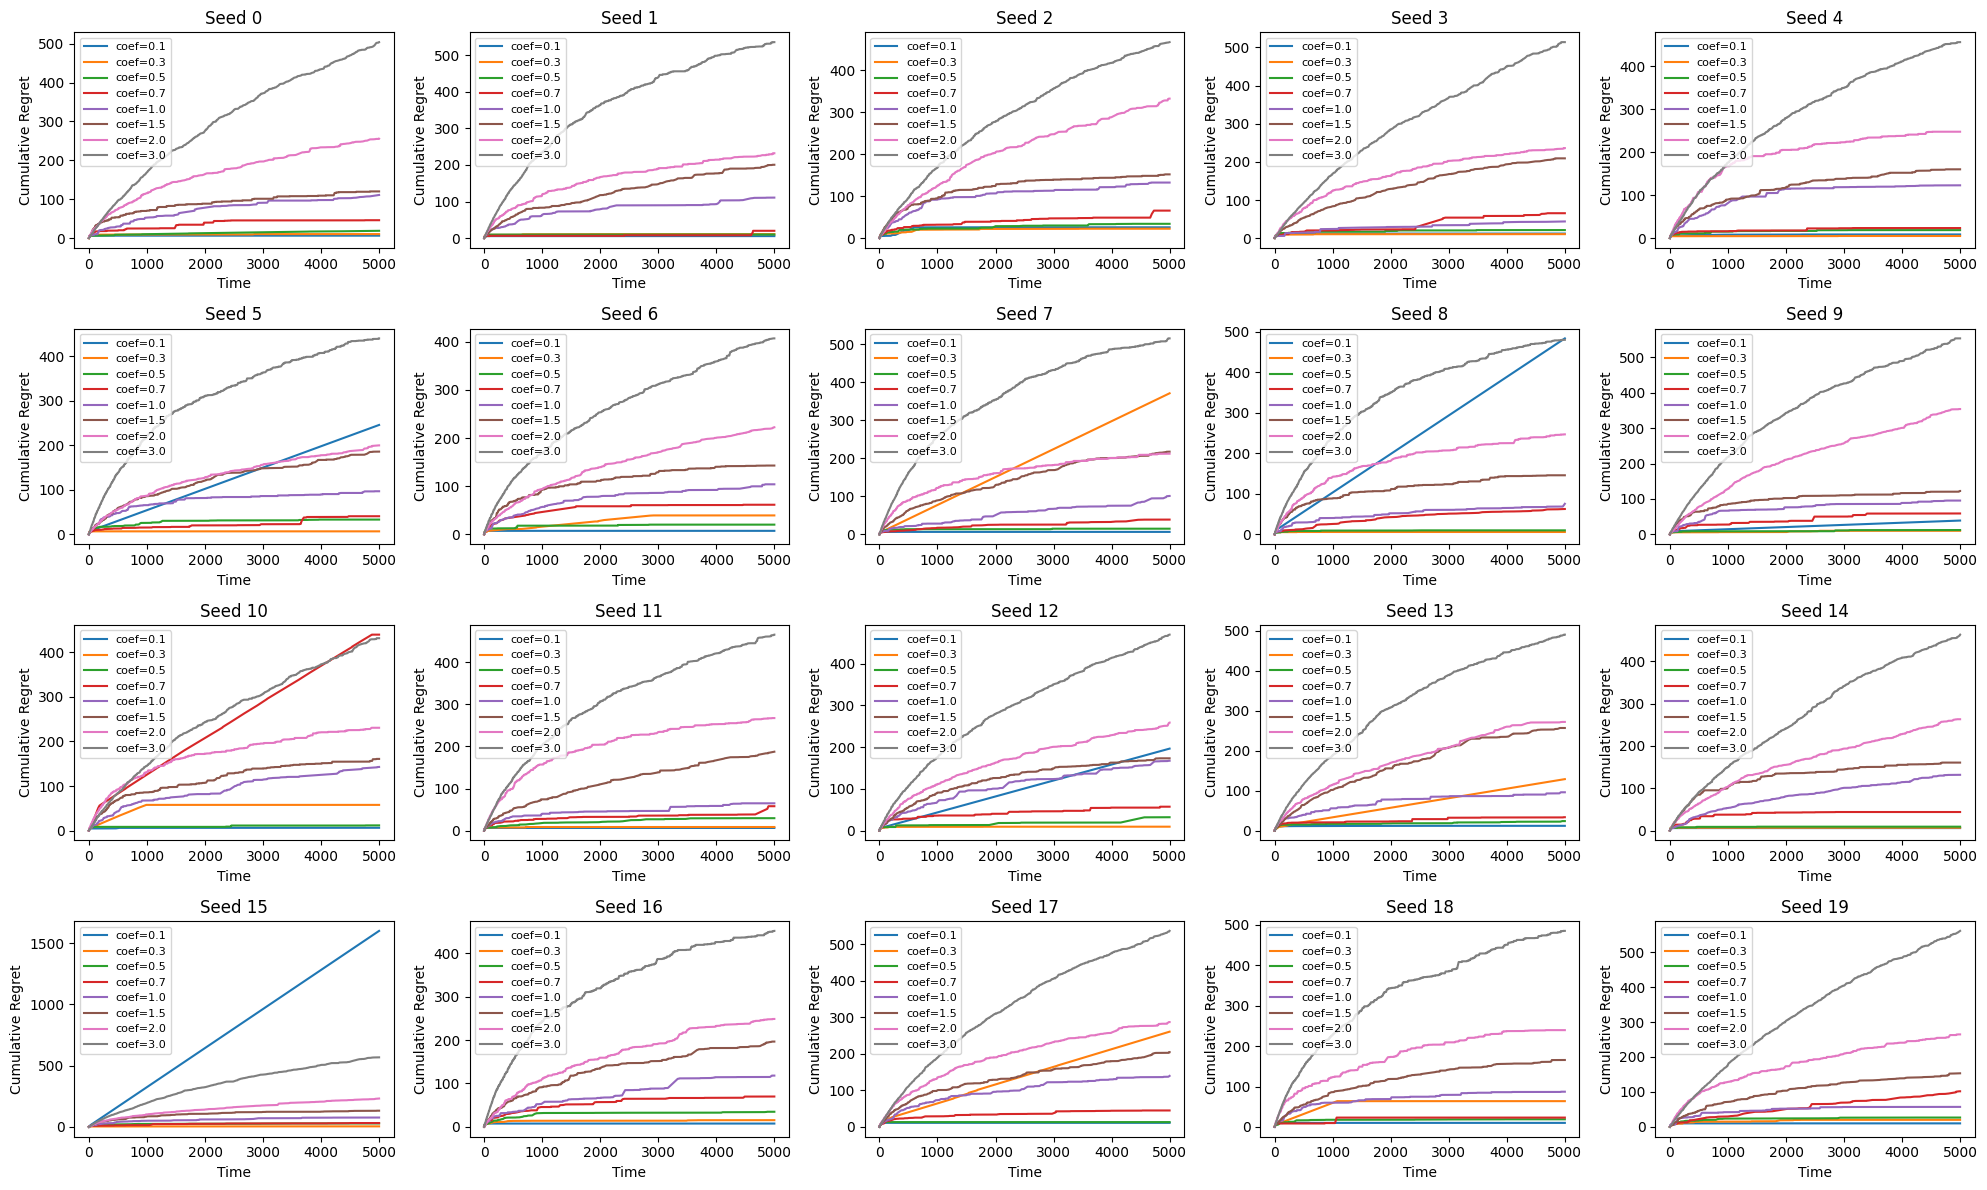

📊 各 coef 下的 50 次平均累积懊悔（5000 步）：
coef=0.10 → 平均累计懊悔: 155.71
coef=0.30 → 平均累计懊悔: 61.75
coef=0.50 → 平均累计懊悔: 23.78
coef=0.70 → 平均累计懊悔: 56.88
coef=1.00 → 平均累计懊悔: 96.52
coef=1.50 → 平均累计懊悔: 171.76
coef=2.00 → 平均累计懊悔: 262.93
coef=3.00 → 平均累计懊悔: 480.00


In [68]:
def plot_results_grid(all_solvers, solver_names, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows))
    for i, ax in enumerate(axes.flat):
        solvers = all_solvers[i]
        for solver, name in zip(solvers, solver_names):
            ax.plot(range(len(solver.regrets)), solver.regrets, label=name)
        ax.set_title(f"Seed {i}")
        ax.set_xlabel("Time")
        ax.set_ylabel("Cumulative Regret")
        ax.legend(fontsize=8)
    plt.tight_layout()
    plt.show()

# ========================= 🔧 主逻辑 ============================= #

np.random.seed(0)
coef_list = [0.1, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0]
solver_names = [f"coef={c}" for c in coef_list]
num_experiments = 50
num_steps = 5000
K = 10

# 保存所有 experiment 的 solver，用于画图
all_solver_lists = []

# 用于累计平均懊悔
final_regrets_by_coef = {c: [] for c in coef_list}

for i in range(num_experiments):
    np.random.seed(i)
    solvers = []
    for coef in coef_list:
        bandit = BernoulliBandit(K)
        solver = UCB(bandit, coef=coef)
        solver.run(num_steps)
        solvers.append(solver)
        final_regrets_by_coef[coef].append(solver.regrets[-1])  # 累积懊悔末值
    all_solver_lists.append(solvers)

# 🎨 画前 20 个实验的子图（4x5）
plot_results_grid(all_solver_lists[:20], solver_names, rows=4, cols=5)

# 📢 输出平均累积懊悔
print("📊 各 coef 下的 50 次平均累积懊悔（5000 步）：")
for coef in coef_list:
    avg_regret = np.mean(final_regrets_by_coef[coef])
    print(f"coef={coef:.2f} → 平均累计懊悔: {avg_regret:.2f}")

汤普森采样算法的累积懊悔为： 66.47979711805849


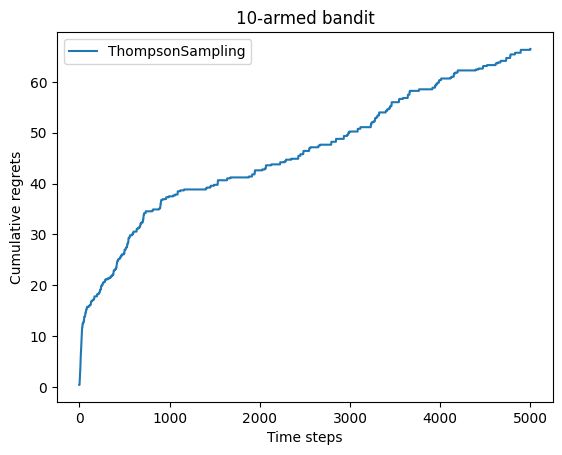

In [100]:
class ThompsonSampling(Solver):
    """ 汤普森采样算法,继承Solver类 """
    def __init__(self, bandit):
        super(ThompsonSampling, self).__init__(bandit)
        self._a = np.ones(self.bandit.K)  # 列表,表示每根拉杆奖励为1的次数
        self._b = np.ones(self.bandit.K)  # 列表,表示每根拉杆奖励为0的次数
        # 新增：记录每个arm被选择的次数
        self.selection_count = np.zeros(self.bandit.K)  


    def run_one_step(self):
        samples = np.random.beta(self._a, self._b)  # 按照Beta分布采样一组奖励样本
        k = np.argmax(samples)  # 选出采样奖励最大的拉杆
        r = self.bandit.step(k)

        self._a[k] += r  # 更新Beta分布的第一个参数
        self._b[k] += (1 - r)  # 更新Beta分布的第二个参数

        self.selection_count[k] += 1  # 记录本次选择
        
        return k


np.random.seed()
thompson_sampling_solver = ThompsonSampling(bandit_10_arm)
thompson_sampling_solver.run(5000)
print('汤普森采样算法的累积懊悔为：', thompson_sampling_solver.regret)
plot_results([thompson_sampling_solver], ["ThompsonSampling"])

# 汤普森采样算法的累积懊悔为：57.19161964443925

Step 0:
Step 263:
Step 526:
Step 789:
Step 1052:
Step 1315:
Step 1578:
Step 1842:
Step 2105:
Step 2368:
Step 2631:
Step 2894:
Step 3157:
Step 3421:
Step 3684:
Step 3947:
Step 4210:
Step 4473:
Step 4736:
Step 5000:
=== 总体统计 ===
系统最终最偏爱的拉杆是：Arm 1
每个拉杆被选择的次数如下：


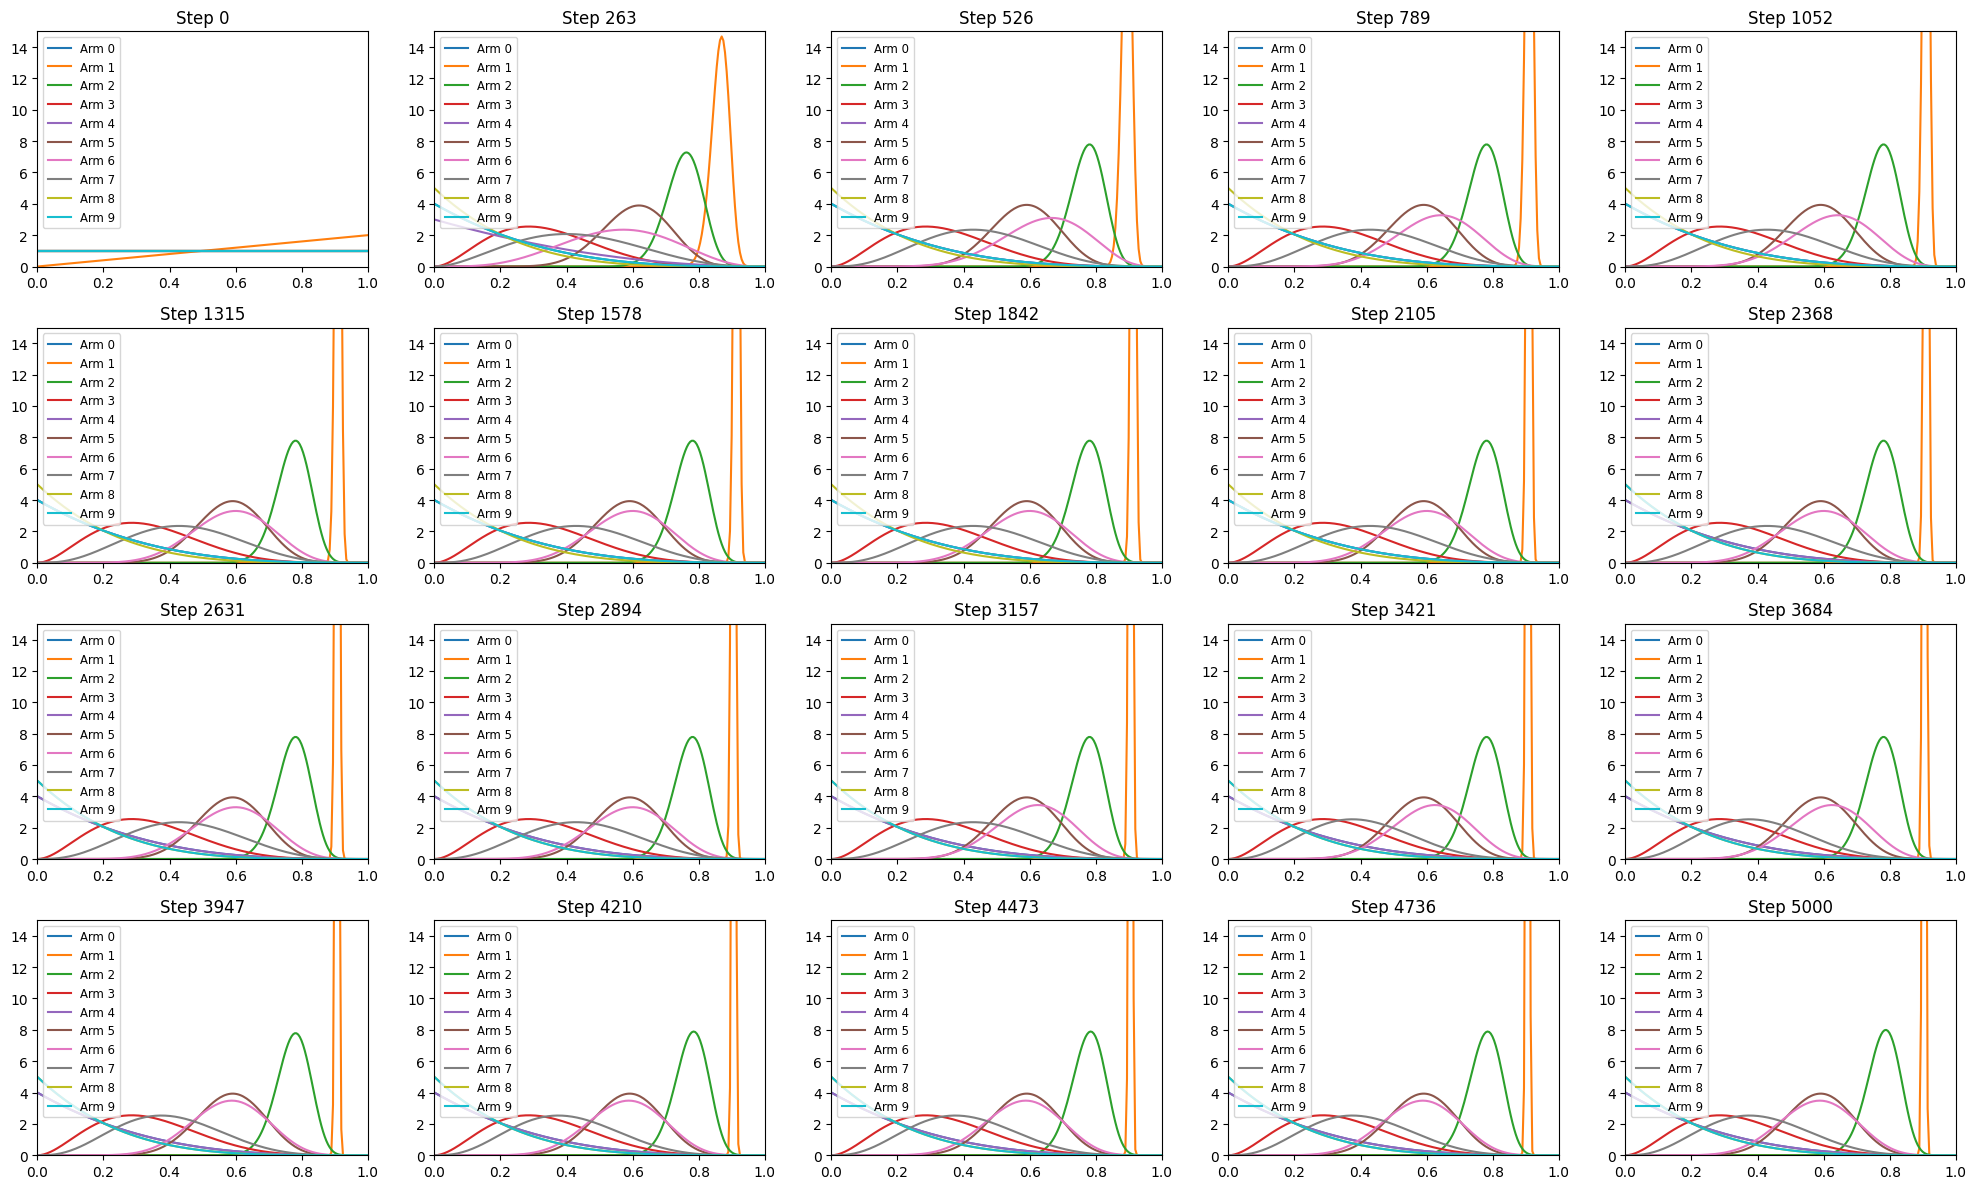

In [110]:
from scipy.stats import beta

# 重新初始化
np.random.seed()
bandit = BernoulliBandit(K)
solver = ThompsonSampling(bandit)

# 确保准确采样 20 个时间点
capture_points = np.linspace(0, 5000, 20, dtype=int)
recorded_params = []

current_step = 0
for target_step in capture_points:
    while current_step <= target_step:
        solver.run_one_step()
        current_step += 1
    recorded_params.append((solver._a.copy(), solver._b.copy()))
    print(solver)
    print(f"Step {target_step}:")
    a, b = solver._a.copy(), solver._b.copy()

# 输出被选择次数最多的arm - 为arm6
most_selected = np.argmax(solver.selection_count)
print("=== 总体统计 ===")
print(f"系统最终最偏爱的拉杆是：Arm {most_selected}")
print("每个拉杆被选择的次数如下：")
# for i in range(solver.bandit.K):
    # print(f"  Arm {i}: {int(solver.selection_count[i])} 次")

# 绘图展示 Beta 分布的变化
fig, axes = plt.subplots(4, 5, figsize=(20, 12))
x = np.linspace(0, 1, 200)

for idx, ax in enumerate(axes.flat):
    a, b = recorded_params[idx]
    for i in range(K):
        ax.plot(x, beta.pdf(x, a[i], b[i]), label=f"Arm {i}")
    ax.set_title(f"Step {capture_points[idx]}")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 15)
    ax.legend(loc="upper left", fontsize='small')

plt.tight_layout()
plt.show()

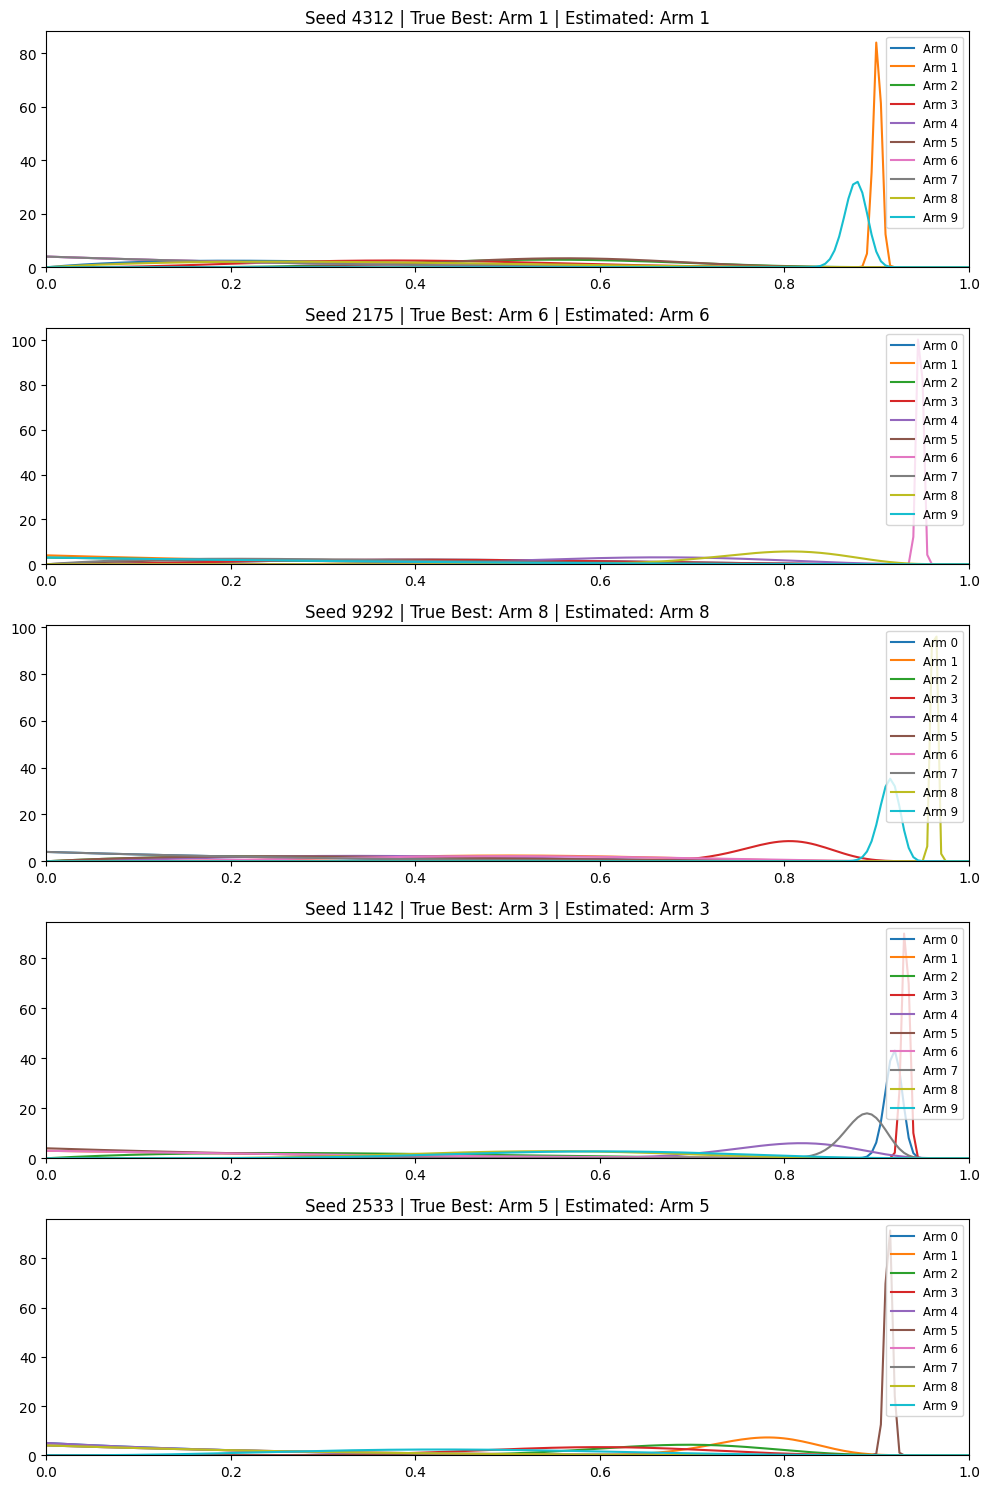

In [112]:
# 比较不同种子下的结果
results = []
seeds = np.random.randint(0, 10000, 5)
K = 10
steps = 5000

for seed in seeds:
    np.random.seed(seed)
    bandit = BernoulliBandit(K)
    solver = ThompsonSampling(bandit)
    for _ in range(steps):
        solver.run_one_step()
    results.append({
        'seed': seed,
        'a': solver._a.copy(),
        'b': solver._b.copy(),
        'selection_count': solver.selection_count.copy(),
        'true_best': bandit.best_idx,
        'estimated_best': np.argmax(solver._a / (solver._a + solver._b))
    })

# 可视化每个随机种子的 Beta 分布
fig, axes = plt.subplots(len(seeds), 1, figsize=(10, 3 * len(seeds)))
x = np.linspace(0, 1, 200)

for idx, res in enumerate(results):
    a, b = res['a'], res['b']
    ax = axes[idx]
    for i in range(K):
        y = beta.pdf(x, a[i], b[i])
        ax.plot(x, y, label=f"Arm {i}")
    ax.set_title(f"Seed {res['seed']} | True Best: Arm {res['true_best']} | Estimated: Arm {res['estimated_best']}")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, None)
    ax.legend(loc="upper right", fontsize='small')

plt.tight_layout()
plt.show()

	在这张图中，表现最好的 arm 是在 Beta 分布上逐渐收敛得最尖锐、峰值最高、趋近于右侧（接近 1）的那个拉杆。  
    1.	不确定性收敛体现：  
	•	Beta 分布的收缩（尖化）表示模型对某个拉杆的奖励估计越来越确信；  
	•	最优拉杆分布最终尖锐集中于高概率区（如 0.8~1.0）。  
	2.	探索-利用平衡：  
	•	一开始所有拉杆都被尝试；  
	•	随着反馈更新，模型逐步聚焦于表现好的拉杆，牺牲对差的探索。  
	3.	Thompson Sampling 的优势直观体现：  
	•	在不设固定 ε 的前提下，自动调整探索程度；  
	•	分布更新过程解释了为什么 Thompson Sampling 能在很多场景优于 ε-greedy 和 UCB。  